# Load libraries

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import sys
import scipy.io
import os
import sys
from pathlib import Path
import pickle
from gc import collect
from glob import glob
from datetime import datetime
import traceback
from time import sleep
import matplotlib.dates as mdates
from mpl_toolkits.axes_grid1 import make_axes_locatable


#Important!! Make sure your current directory is the MHDTurbPy folder!
os.chdir("/Users/nokni/work/MHDTurbPy/")


# Make sure to use the local spedas
sys.path.insert(0, os.path.join(os.getcwd(), 'pyspedas'))
import pyspedas
from pyspedas.utilities import time_string
from pytplot import get_data


""" Import manual functions """

sys.path.insert(1, os.path.join(os.getcwd(), 'functions'))
import calc_diagnostics as calc
import TurbPy as turb
import general_functions as func
import Figures as figs
from   SEA import SEA

sys.path.insert(1, os.path.join(os.getcwd(), 'functions/3d_anis_analysis_toolboox'))
import collect_wave_coeffs 
import data_analysis 


# Better figures
from matplotlib import pyplot as plt
plt.style.use(['science', 'scatter'])
plt.rcParams['text.usetex'] = True

os.environ["CDF_LIB"] = "/Applications/cdf/cdf/lib"




This unreleased version of SpacePy is not supported by the SpacePy team.


In [2]:
fnames = func.load_files('/Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic', 'final/5pt_extra_conditions_sfuncs_estimated.pkl')
gnames = func.load_files('/Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic', 'general.pkl')
finnames = func.load_files('/Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic', 'final_data.pkl')
# func.delete_files_and_folders(fnames)

#func.find_matching_files_with_common_parent

_,gnames =func.find_matching_files_with_common_parent(fnames, 
                                            '/5pt_extra_conditions_sfuncs_estimated.pkl',
                                            gnames,
                                            'general.pkl',
                                            num_parents_f=2,
                                            num_parents_g=1
                                           )

_,finnames =func.find_matching_files_with_common_parent(fnames, 
                                            '/5pt_extra_conditions_sfuncs_estimated.pkl',
                                            finnames,
                                            'final_data.pkl',
                                            num_parents_f=2,
                                            num_parents_g=1
                                           )

/Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/*/final/5pt_extra_conditions_sfuncs_estimated.pkl
/Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/*/general.pkl
/Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/*/final_data.pkl


In [3]:
len(fnames), len(finnames)

(175, 175)

18-Oct-23 05:38:03: /var/folders/vj/mxbpcd0j13b_qfbqdq6h8b8r0000gs/T/ipykernel_9754/447652545.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  perp_rat   = np.array(perp_rat)[ind]

18-Oct-23 05:38:03: /var/folders/vj/mxbpcd0j13b_qfbqdq6h8b8r0000gs/T/ipykernel_9754/447652545.py:26: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  par_rat   = np.array(par_rat)[ind]

18-Oct-23 05:38:03: /var/folders/vj/mxbpcd0j13b_qfbqdq6h8b8r0000gs/T/ipykernel_9754/447652545.py:27: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a

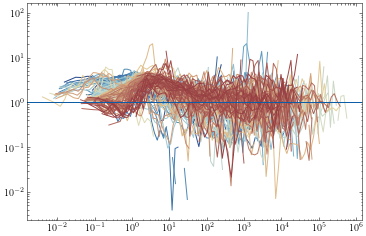

In [14]:
lx0, xf = 1e2, 1e4
which ='ell_overall'


perp_rat   = []
par_rat    = []
lengths_di = []
dist       = []
sig_c      = []
for fname, gname, finname in zip(fnames, gnames, finnames):
    #print(fname)
    B = pd.read_pickle(fname)
    gen = pd.read_pickle(gname)
    f = pd.read_pickle(finname)
    
    
    perp_rat.append(B['Sfuncs']['B']['ell_perp'][1]/B['Sfuncs']['B']['Ell_perp'][1])
    par_rat.append(B['Sfuncs']['B']['ell_perp'][1]/B['Sfuncs']['B']['ell_par'][1])
    lengths_di.append(B['ell_di'])
    dist.append(gen['d'])
    sig_c.append(f['Par']['sigma_c_median'])

    
ind        = np.argsort(dist)
perp_rat   = np.array(perp_rat)[ind]
par_rat   = np.array(par_rat)[ind]
lengths_di = np.array(lengths_di)[ind]
dist       = np.array(dist)[ind]



c =figs.create_colors(len(dist))

for i in range(len(dist)):
    plt.loglog(lengths_di[i], perp_rat[i], c=c[i], ms=0, ls='-')
    
plt.axhline(y=1)

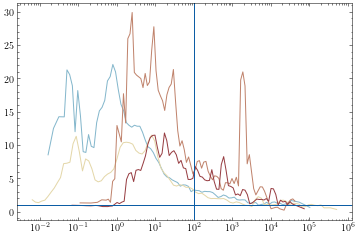

In [26]:
dbins = np.linspace(0, 0.45,5)

from scipy.signal import savgol_filter
c= figs.create_colors( len(dbins))
for jj in range(1, len(dbins)):
    try:
        indd = (dist>dbins[jj-1]) & (dist<dbins[jj]) & (np.array(sig_c)>0.9)

        xv, yv = np.hstack(lengths_di[indd]), np.hstack(par_rat[indd])
        result = func.binned_quantity(xv, yv, bins=101, what ='mean')
        #mm     = func.smoothing_function(result[0], result[1])
        
        xvv, yvv = result[0], result[1]
        
        mask     = (xvv>0) & (yvv>0)
        yhat = savgol_filter( yvv[mask] ,5, 2)
        plt.semilogx(xvv[mask], yhat, c=c[jj], ms=0, ls='-')
    except:
        traceback.print_exc()

plt.axhline(y=1)
plt.axvline(x=100)

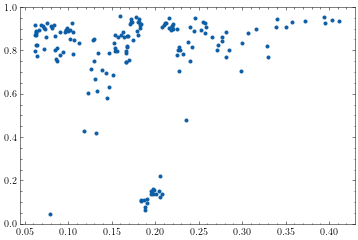

In [17]:
plt.plot(dist, sig_c)


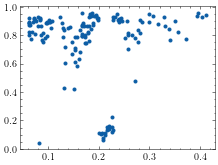

In [99]:
plt.plot(dist, sig_c)

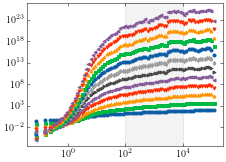

In [24]:
x0, xf = 1e2, 1e4
which ='ell_overall'



B = pd.read_pickle(fnames[-15])

fit = []
for i in range(len(B['Sfuncs']['B'][which])):
    plt.loglog(B['ell_di'], B['Sfuncs']['B'][which][i])##.keys()
    
    r = func.find_fit(B['ell_di'], B['Sfuncs']['B'][which][i], x0, xf)
    
    plt.axvspan(x0, xf, alpha=0.02, color='lightgray')
    fit.append(r[0][0][1])

0.6116130721001192


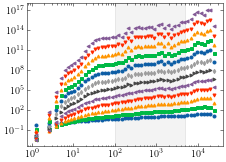

In [68]:
x0, xf = 1e2, 5e3
which ='ell_overall'

N  = 50
B = pd.read_pickle(fnames[N])
g = pd.read_pickle(gnames[N])
f = pd.read_pickle(finnames[N])
fit = []
for i in range(len(B['Sfuncs']['B'][which])):
    plt.loglog(B['ell_di'], B['Sfuncs']['B'][which][i])##.keys()
    
    r = func.find_fit(B['ell_di'], B['Sfuncs']['B'][which][i], x0, xf)
    
    plt.axvspan(x0, xf, alpha=0.02, color='lightgray')
    fit.append(r[0][0][1])
    
print(f['Par']['sigma_c_median'])

In [61]:
g

{'Start_Time': Timestamp('2021-01-06 13:59:59.856000', freq='109L'),
 'End_Time': Timestamp('2021-01-06 16:37:59.804000', freq='109L'),
 'd': 0.39488499353753775,
 'Fraction_missing_MAG': 0.0,
 'Fract_large_gaps': 0.0,
 'Resolution_MAG': 109.7564810872728,
 'Fraction_missing_part': 6.928406466512702,
 'Resolution_part': 32340.37446848968,
 'part_flag': 'empirical',
 'qtn_flag': 'QTN'}

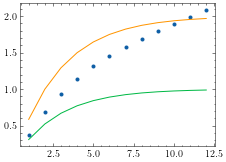

In [56]:
t = turb.Chandran_scaling(len(fit))

plt.plot(t[0], fit)
plt.plot(t[0], t[1], ms=0, ls='-')

t = turb.MS17_par(len(fit))
plt.plot(t[0], t[1], ms=0, ls='-')


## Bdf = B['Mag']['B_resampled']

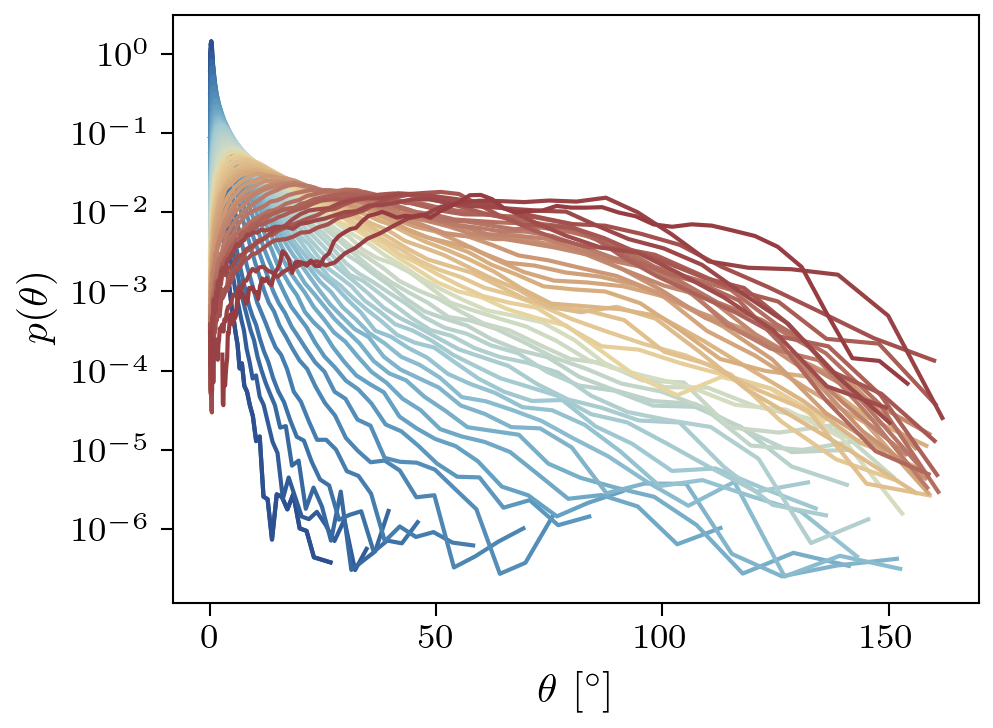

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

def compute_pdf(tau, Bdf, func):
    resu = turb.mag_rotations_zhdankin_single_iter(tau, Bdf, return_dataframe=0)
    pdf = func.pdf(resu[resu > 0], 100, 1, 1)
    return pdf

taus = (2**np.linspace(1, 20, 50)).astype(int)


h_many_di          = 100 
di                 = findata['Par']['di_mean']
Vsw                = findata['Par']['Vsw_mean']
dt                 = func.find_cadence(findata['Mag']['B_resampled'])

# Parallel computation
results = Parallel(n_jobs=-1)(delayed(compute_pdf)(tau, Bdf, func) for tau in taus)


# Plot results
cols =figs.create_colors(len(results))
fig, ax =figs.initializeFigure('x', 'y')
for pdf, col in zip(results,cols):
    plt.semilogy(pdf[0], pdf[1], c=col, ms=0, ls='-')


ax.set_ylabel(r'$p(\theta)$')
ax.set_xlabel(r'$\theta ~[^{\circ}]$')

ax.set_xscale('linear')

17-Oct-23 08:39:35: /Users/nokni/work/MHDTurbPy/functions/TurbPy.py:974: RuntimeWarning: invalid value encountered in arccos
  α_degrees = np.arccos(dot_product / norms) * (180/np.pi)

17-Oct-23 08:39:35: /Users/nokni/work/MHDTurbPy/functions/TurbPy.py:974: RuntimeWarning: invalid value encountered in arccos
  α_degrees = np.arccos(dot_product / norms) * (180/np.pi)

17-Oct-23 08:39:35: /Users/nokni/work/MHDTurbPy/functions/TurbPy.py:974: RuntimeWarning: invalid value encountered in arccos
  α_degrees = np.arccos(dot_product / norms) * (180/np.pi)

17-Oct-23 08:39:35: /Users/nokni/work/MHDTurbPy/functions/TurbPy.py:974: RuntimeWarning: invalid value encountered in arccos
  α_degrees = np.arccos(dot_product / norms) * (180/np.pi)

17-Oct-23 08:39:35: /Users/nokni/work/MHDTurbPy/functions/TurbPy.py:974: RuntimeWarning: invalid value encountered in arccos
  α_degrees = np.arccos(dot_product / norms) * (180/np.pi)

17-Oct-23 08:39:35: /Users/nokni/work/MHDTurbPy/functions/TurbPy.py:974: Ru

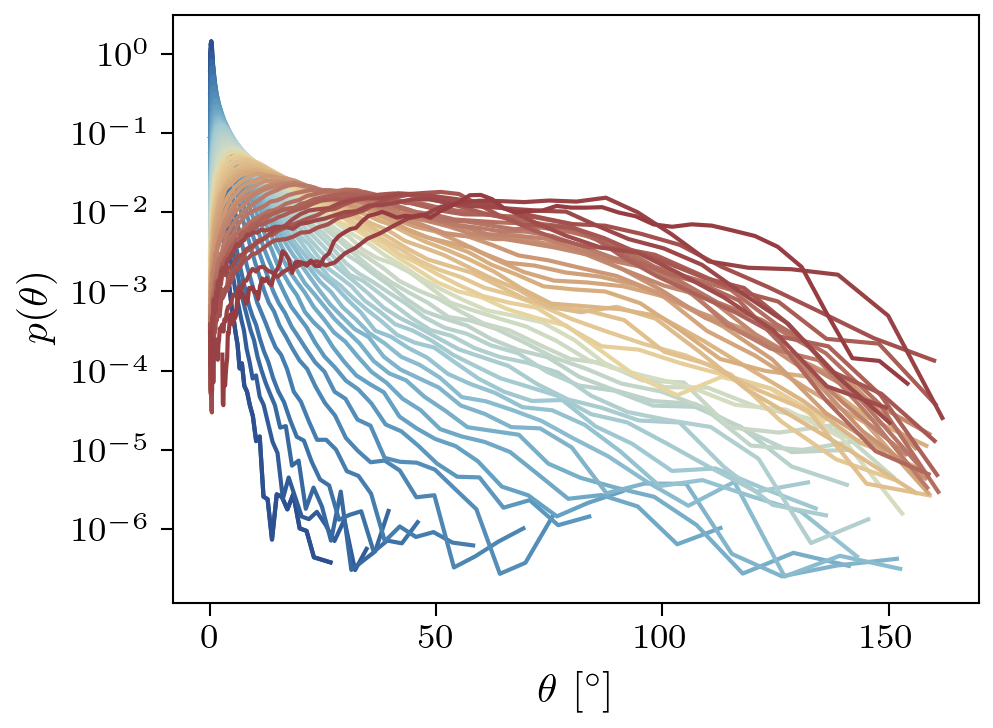

This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported by the SpacePy team.
This unreleased version of SpacePy is not supported

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from joblib import Parallel, delayed

def compute_pdf(tau, Bdf, func):
    resu = turb.mag_rotations_zhdankin_single_iter(tau, Bdf, return_dataframe=0)
    pdf = func.pdf(resu[resu > 0], 100, 1, 1)
    return pdf

taus = (2**np.linspace(1, 20, 50)).astype(int)

# Parallel computation
results = Parallel(n_jobs=-1)(delayed(compute_pdf)(tau, Bdf, func) for tau in taus)


# Plot results
cols =figs.create_colors(len(results))
fig, ax =figs.initializeFigure('x', 'y')
for pdf, col in zip(results,cols):
    plt.semilogy(pdf[0], pdf[1], c=col, ms=0, ls='-')


ax.set_ylabel(r'$p(\theta)$')
ax.set_xlabel(r'$\theta ~[^{\circ}]$')

ax.set_xscale('linear')

In [35]:
len(resu), len(Bdf)

(1264615, 1264615)

In [51]:
import numpy as np
import pandas as pd



# Download data

In [ ]:
from joblib import Parallel, delayed

# Choose PSP or SolO
sc                      = 0                                  # PSP:0, SolO:1

# If you only need to download 1 interval (dates wont matter if only_one_interval=0)
only_one_interval       = 0                                    # If you only want to check one interval

alfvenic_intervals      = True
cdf_lib_path            = '/Applications/cdf/cdf/lib'            # You will need to read cdf files. You have to specify the path
choose_working_dir      = '/Users/nokni/work/sc_data/'           # Working dir. Usually where you save raw data (a psp_data, and/or solar_orbiter_data folder will be created)

#User defined parameters
addit_time_around       =  12                                     # [start_time -addit_time_around [h], end_time + addit_time_around [h]]
high_resol_data         = True
subtract_rol_mean       = 1                                      # To estimate fluctuations of mag, vel field
rolling_window          = '1h'                                   # When estimating fluctuations, size of window (centered around -w/2 -w/2
gap_time_threshold      = 5                                      # Threshold for large gaps (units of seconds)
estimate_PSD            = 0                                      # Estimate magentic field powes spectral density (keep false)
estimate_PSD_V          = 0                                      # Estimate velocity field powes spectral density (keep false)
high_res_mag            = 0                                      # Use high resol or low resolution magnetic field data ( Choose either 1 or 0 respectively)
in_RTN                  = 1                                      # RTN or spacecraft frame ( We will usually use RTN)
f_min_spec              = 2e-3                                   # Integrate over [f_min_spec, f_max_spec]to estimate σc, σr 
f_max_spec              = 1e-2                                   #
step                    = '1H'                                  # Move starting point by step (in Hours)
duration                = '3H'                                  # Duration of interval (in Hours)
settings                =  {
                            'particle_mode': '9th_perih_cut',     # either: 'spc', 'span', '9th_perih_cut'
                            'apply_hampel' : 0,                # Use hampelfilter to despike plasma data
                            'part_resol'   : 1000,                # Max resol of plasma data                [ms]
                            'MAG_resol'    : 1                # Max resol og magnetic field data        [ms]   # Above 450

                            } 
credentials         = { 'psp':{
                               'fields': {'username': 'mvelli', 'password': 'flds@psp'},
                               'sweap' : {'username': 'mvelli', 'password': '2019swe@pd@ta'}
                              }
                      }

if sc==0:
    vars_2_downnload = {'mag': None, 'span': None,'span-a': None, 'spc': None, 'qtn': None, 'ephem': None}
    
elif sc==1:
    vars_2_downnload = {'mag': None, 'qtn': None, 'swa': None, 'ephem': None} 
else:
    print('Not ready yet!')
    
    

# on the other hand if you have a list of intervals
load_dir_path           = '/Users/nokni/work/3d_anisotropy/radial_evolution/data/selected_intervals/'


if sc ==0:
    if alfvenic_intervals:
        
        load_path               = str(load_dir_path)+'all_psp_slow_alfvenic_intervals_final.pkl' # In case you have multiple days you want to download ()
        save_path               = '/Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic'                                # This will be connected with the parent of load_path
        
        
    else:
        load_path               = str(load_dir_path)+'all_psp_slow_non_alfvenic_intervals_nikos.pkl' # In case you have multiple days you want to download ()
        save_path               = '/Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_non_alfvenic'                                # This will be connected with the parent of load_path

elif sc ==1:
    if alfvenic_intervals:
        
        load_path               = str(load_dir_path)+'solo_alfvenic_raffaela_intervals.pkl' # In case you have multiple days you want to download ()
        save_path               = '/Volumes/Elements-1/andreaL/radial_evolution/SolO/slow_alfvenic'                                # This will be connected with the parent of load_path
        
else:
    print('under consruction')

    

# Change to to specified working dir
os.chdir(choose_working_dir)


# load dataframe
df                      =  pd.read_pickle(load_path)

# Define final path
final_path              =  Path(save_path)


# Call function
Parallel(n_jobs=1)(delayed(data_analysis.download_files)(ok, 
                                                            df, 
                                                            final_path, 
                                                            only_one_interval, 
                                                            step, 
                                                            duration, 
                                                            addit_time_around, 
                                                            settings, 
                                                            vars_2_downnload, 
                                                            cdf_lib_path, 
                                                            credentials, 
                                                            gap_time_threshold, 
                                                            estimate_PSD_V, 
                                                            subtract_rol_mean, 
                                                            rolling_window, 
                                                            f_min_spec, 
                                                            f_max_spec, 
                                                            estimate_PSD, 
                                                            sc, 
                                                            high_resol_data, 
                                                            in_RTN) for ok in range(len(df)))



Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2019-04-09_05-17-00_2019-04-09_15-09-00_sc_0


17-Oct-23 07:41:55: File is current: psp_data/fields/l2/mag_RTN/2019/04/psp_fld_l2_mag_RTN_2019040812_v02.cdf
17-Oct-23 07:41:55: File is current: psp_data/fields/l2/mag_RTN/2019/04/psp_fld_l2_mag_RTN_2019040818_v02.cdf
17-Oct-23 07:41:55: File is current: psp_data/fields/l2/mag_RTN/2019/04/psp_fld_l2_mag_RTN_2019040900_v02.cdf
17-Oct-23 07:41:55: File is current: psp_data/fields/l2/mag_RTN/2019/04/psp_fld_l2_mag_RTN_2019040906_v02.cdf
17-Oct-23 07:41:55: File is current: psp_data/fields/l2/mag_RTN/2019/04/psp_fld_l2_mag_RTN_2019040912_v02.cdf
17-Oct-23 07:41:55: File is current: psp_data/fields/l2/mag_RTN/2019/04/psp_fld_l2_mag_RTN_2019040918_v02.cdf
17-Oct-23 07:41:55: File is current: psp_data/fields/l2/mag_RTN/2019/04/psp_fld_l2_mag_RTN_2019041000_v02.cdf
17-Oct-23 07:42:26: Time clip was applied to: psp_fld_l2_mag_RTN
17-Oct-23 07:42:27: File is current: psp_data/fields/l2/mag_RTN/2019/04/psp_fld_l2_mag_RTN_2019040812_v02.cdf
17-Oct-23 07:42:27: File is current: psp_data/fields/l2

17-Oct-23 07:42:27: File is current: psp_data/fields/l2/mag_RTN/2019/04/psp_fld_l2_mag_RTN_2019040906_v02.cdf
17-Oct-23 07:42:27: File is current: psp_data/fields/l2/mag_RTN/2019/04/psp_fld_l2_mag_RTN_2019040912_v02.cdf
17-Oct-23 07:42:27: File is current: psp_data/fields/l2/mag_RTN/2019/04/psp_fld_l2_mag_RTN_2019040918_v02.cdf
17-Oct-23 07:42:27: File is current: psp_data/fields/l2/mag_RTN/2019/04/psp_fld_l2_mag_RTN_2019041000_v02.cdf
17-Oct-23 07:42:27: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:43:00: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2019/04/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:43:01: File is current: psp_data/sweap/spi/L3/spi_sf00/2019/04/psp_swp_spi_sf00_L3_mom_20190408_v04.cdf
17-Oct-23 07:43:01: File is current: psp_data/sweap/spi/L3/spi_sf00/2019/04/psp_swp_spi_sf00_L3_mom_20190409_v04.cdf
17-Oct-23 07:43:01: File is current: psp_data/sweap/spi/L3/spi_sf00/2019/04/psp_swp_spi_sf00_L3_mom_20190410_v04.cdf
17-Oct-23 07:43:01: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:43:01: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:43:01: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:43:01: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:43:01: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:43:01: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2019/04/


17-Oct-23 07:43:01: File is current: psp_data/sweap/spi/L3/spi_sf0a/2019/04/psp_swp_spi_sf0a_L3_mom_20190408_v04.cdf
17-Oct-23 07:43:02: File is current: psp_data/sweap/spi/L3/spi_sf0a/2019/04/psp_swp_spi_sf0a_L3_mom_20190409_v04.cdf
17-Oct-23 07:43:02: File is current: psp_data/sweap/spi/L3/spi_sf0a/2019/04/psp_swp_spi_sf0a_L3_mom_20190410_v04.cdf
17-Oct-23 07:43:02: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:43:02: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:43:02: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2019/04/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 07:43:02: File is current: psp_data/sweap/spc/L3/2019/04/psp_swp_spc_l3i_20190408_v01.cdf
17-Oct-23 07:43:02: File is current: psp_data/sweap/spc/L3/2019/04/psp_swp_spc_l3i_20190409_v01.cdf
17-Oct-23 07:43:02: File is current: psp_data/sweap/spc/L3/2019/04/psp_swp_spc_l3i_20190410_v01.cdf
17-Oct-23 07:43:04: Time clip was applied to: psp_spc_np_moment
17-Oct-23 07:43:05: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 07:43:05: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 07:43:05: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 07:43:06: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 07:43:06: Time clip was applied to: psp_spc_na_fit
17-Oct-23 07:43:06: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:43:06: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l

QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3


17-Oct-23 07:43:06: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2019/04/psp_fld_l3_sqtn_rfs_V1V2_20190410_v1.0.cdf
17-Oct-23 07:43:07: Time clip was applied to: electron_density
17-Oct-23 07:43:07: Time clip was applied to: electron_core_temperature
17-Oct-23 07:43:07: File is current: psp_data/fields/l1/ephem_spp_rtn/2019/04/spp_fld_l1_ephem_spp_rtn_20190408_v01.cdf
17-Oct-23 07:43:07: File is current: psp_data/fields/l1/ephem_spp_rtn/2019/04/spp_fld_l1_ephem_spp_rtn_20190409_v01.cdf


17-Oct-23 07:43:07: File is current: psp_data/fields/l1/ephem_spp_rtn/2019/04/spp_fld_l1_ephem_spp_rtn_20190410_v01.cdf
17-Oct-23 07:43:07: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

17-Oct-23 07:43:07: Time clip was applied to: position
17-Oct-23 07:43:07: Time clip was applied to: velocity
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 713, in LoadTimeSeriesPSP
    dfpar, part_flag = create_particle_dataframe(diagnostics_SPC,diagnostics_SPAN, start_time, end_time, dfspc, dfspan, dfqtn, settings)
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 438, in create_particle_dataframe
    freq = f"{round(diagnostics['Init_dt'] * 1000)}ms"
TypeError: unsuppo

failed at index 28 with error: cannot unpack non-iterable NoneType object
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2020-01-21_13-32-00_2020-01-21_18-49-00_sc_0


17-Oct-23 07:43:07: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012118_v02.cdf
17-Oct-23 07:43:07: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012200_v02.cdf
17-Oct-23 07:43:07: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012206_v02.cdf
17-Oct-23 07:43:20: Time clip was applied to: psp_fld_l2_mag_RTN
17-Oct-23 07:43:20: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012100_v02.cdf
17-Oct-23 07:43:20: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012106_v02.cdf
17-Oct-23 07:43:20: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012112_v02.cdf


17-Oct-23 07:43:20: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012118_v02.cdf
17-Oct-23 07:43:21: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012200_v02.cdf
17-Oct-23 07:43:21: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012206_v02.cdf
17-Oct-23 07:43:21: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:43:34: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2020/01/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:43:34: File is current: psp_data/sweap/spi/L3/spi_sf00/2020/01/psp_swp_spi_sf00_L3_mom_20200121_v04.cdf
17-Oct-23 07:43:34: File is current: psp_data/sweap/spi/L3/spi_sf00/2020/01/psp_swp_spi_sf00_L3_mom_20200122_v04.cdf
17-Oct-23 07:43:34: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:43:34: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:43:34: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:43:34: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:43:34: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:43:34: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2020/01/


17-Oct-23 07:43:35: File is current: psp_data/sweap/spi/L3/spi_sf0a/2020/01/psp_swp_spi_sf0a_L3_mom_20200121_v04.cdf
17-Oct-23 07:43:35: File is current: psp_data/sweap/spi/L3/spi_sf0a/2020/01/psp_swp_spi_sf0a_L3_mom_20200122_v04.cdf
17-Oct-23 07:43:35: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:43:35: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2020/01/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 07:43:35: File is current: psp_data/sweap/spc/L3/2020/01/psp_swp_spc_l3i_20200121_v02.cdf
17-Oct-23 07:43:35: File is current: psp_data/sweap/spc/L3/2020/01/psp_swp_spc_l3i_20200122_v02.cdf
17-Oct-23 07:43:36: Time clip was applied to: psp_spc_np_moment
17-Oct-23 07:43:36: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 07:43:36: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 07:43:36: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 07:43:36: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 07:43:36: Time clip was applied to: psp_spc_na_fit
17-Oct-23 07:43:36: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:43:36: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2020/01/
17-Oct-23 07:43:36: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2020/

QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3


17-Oct-23 07:43:36: File is current: psp_data/fields/l1/ephem_spp_rtn/2020/01/spp_fld_l1_ephem_spp_rtn_20200121_v01.cdf
17-Oct-23 07:43:36: File is current: psp_data/fields/l1/ephem_spp_rtn/2020/01/spp_fld_l1_ephem_spp_rtn_20200122_v01.cdf
17-Oct-23 07:43:36: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

17-Oct-23 07:43:36: Time clip was applied to: position
17-Oct-23 07:43:36: Time clip was applied to: velocity
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 713, in LoadTimeSeriesPSP
    dfpar, part_flag = create_particle_dataframe(diagnostics_SPC,diagnostics_SPAN, start_time, end_time, dfspc, dfspan, dfqtn, settings)
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/P

failed at index 38 with error: cannot unpack non-iterable NoneType object
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2020-01-25_04-29-00_2020-01-25_15-39-00_sc_0


17-Oct-23 07:43:37: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012506_v02.cdf
17-Oct-23 07:43:37: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012512_v02.cdf
17-Oct-23 07:43:37: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012518_v02.cdf
17-Oct-23 07:43:37: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012600_v02.cdf
17-Oct-23 07:43:55: Time clip was applied to: psp_fld_l2_mag_RTN
17-Oct-23 07:43:55: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012412_v02.cdf
17-Oct-23 07:43:55: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012418_v02.cdf
17-Oct-23 07:43:55: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012500_v02.cdf


17-Oct-23 07:43:55: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012506_v02.cdf
17-Oct-23 07:43:55: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012512_v02.cdf
17-Oct-23 07:43:56: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012518_v02.cdf
17-Oct-23 07:43:56: File is current: psp_data/fields/l2/mag_RTN/2020/01/psp_fld_l2_mag_RTN_2020012600_v02.cdf
17-Oct-23 07:43:56: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:44:16: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2020/01/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:44:17: File is current: psp_data/sweap/spi/L3/spi_sf00/2020/01/psp_swp_spi_sf00_L3_mom_20200124_v04.cdf
17-Oct-23 07:44:17: File is current: psp_data/sweap/spi/L3/spi_sf00/2020/01/psp_swp_spi_sf00_L3_mom_20200125_v04.cdf
17-Oct-23 07:44:17: File is current: psp_data/sweap/spi/L3/spi_sf00/2020/01/psp_swp_spi_sf00_L3_mom_20200126_v04.cdf
17-Oct-23 07:44:17: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:44:17: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:44:17: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:44:17: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:44:17: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:44:17: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2020/01/


17-Oct-23 07:44:17: File is current: psp_data/sweap/spi/L3/spi_sf0a/2020/01/psp_swp_spi_sf0a_L3_mom_20200124_v04.cdf
17-Oct-23 07:44:18: File is current: psp_data/sweap/spi/L3/spi_sf0a/2020/01/psp_swp_spi_sf0a_L3_mom_20200125_v04.cdf
17-Oct-23 07:44:18: File is current: psp_data/sweap/spi/L3/spi_sf0a/2020/01/psp_swp_spi_sf0a_L3_mom_20200126_v04.cdf
17-Oct-23 07:44:18: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:44:18: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:44:18: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2020/01/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 07:44:18: File is current: psp_data/sweap/spc/L3/2020/01/psp_swp_spc_l3i_20200124_v02.cdf
17-Oct-23 07:44:18: File is current: psp_data/sweap/spc/L3/2020/01/psp_swp_spc_l3i_20200125_v02.cdf
17-Oct-23 07:44:19: File is current: psp_data/sweap/spc/L3/2020/01/psp_swp_spc_l3i_20200126_v02.cdf
17-Oct-23 07:44:20: Time clip was applied to: psp_spc_np_moment
17-Oct-23 07:44:20: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 07:44:20: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 07:44:20: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 07:44:21: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 07:44:21: Time clip was applied to: psp_spc_na_fit
17-Oct-23 07:44:21: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:44:21: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l

QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3


17-Oct-23 07:44:21: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2020/01/psp_fld_l3_sqtn_rfs_V1V2_20200126_v1.0.cdf
17-Oct-23 07:44:21: Time clip was applied to: electron_density
17-Oct-23 07:44:21: Time clip was applied to: electron_core_temperature
17-Oct-23 07:44:21: File is current: psp_data/fields/l1/ephem_spp_rtn/2020/01/spp_fld_l1_ephem_spp_rtn_20200124_v01.cdf
17-Oct-23 07:44:21: File is current: psp_data/fields/l1/ephem_spp_rtn/2020/01/spp_fld_l1_ephem_spp_rtn_20200125_v01.cdf
17-Oct-23 07:44:22: File is current: psp_data/fields/l1/ephem_spp_rtn/2020/01/spp_fld_l1_ephem_spp_rtn_20200126_v01.cdf


17-Oct-23 07:44:22: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

17-Oct-23 07:44:22: Time clip was applied to: position
17-Oct-23 07:44:22: Time clip was applied to: velocity
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 713, in LoadTimeSeriesPSP
    dfpar, part_flag = create_particle_dataframe(diagnostics_SPC,diagnostics_SPAN, start_time, end_time, dfspc, dfspan, dfqtn, settings)
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 438, in create_particle_dataframe
    freq = f"{round(diagnostics['Init_dt'] * 1000)}ms"
TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/

failed at index 41 with error: cannot unpack non-iterable NoneType object
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2021-01-21_08-51-00_2021-01-21_17-28-00_sc_0


17-Oct-23 07:44:22: File is current: psp_data/fields/l2/mag_RTN/2021/01/psp_fld_l2_mag_RTN_2021012112_v02.cdf
17-Oct-23 07:44:22: File is current: psp_data/fields/l2/mag_RTN/2021/01/psp_fld_l2_mag_RTN_2021012118_v02.cdf
17-Oct-23 07:44:22: File is current: psp_data/fields/l2/mag_RTN/2021/01/psp_fld_l2_mag_RTN_2021012200_v02.cdf
17-Oct-23 07:44:48: Time clip was applied to: psp_fld_l2_mag_RTN
17-Oct-23 07:44:48: File is current: psp_data/fields/l2/mag_RTN/2021/01/psp_fld_l2_mag_RTN_2021012018_v02.cdf
17-Oct-23 07:44:48: File is current: psp_data/fields/l2/mag_RTN/2021/01/psp_fld_l2_mag_RTN_2021012100_v02.cdf
17-Oct-23 07:44:48: File is current: psp_data/fields/l2/mag_RTN/2021/01/psp_fld_l2_mag_RTN_2021012106_v02.cdf


17-Oct-23 07:44:49: File is current: psp_data/fields/l2/mag_RTN/2021/01/psp_fld_l2_mag_RTN_2021012112_v02.cdf
17-Oct-23 07:44:49: File is current: psp_data/fields/l2/mag_RTN/2021/01/psp_fld_l2_mag_RTN_2021012118_v02.cdf
17-Oct-23 07:44:49: File is current: psp_data/fields/l2/mag_RTN/2021/01/psp_fld_l2_mag_RTN_2021012200_v02.cdf
17-Oct-23 07:44:49: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:45:20: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2021/01/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:45:20: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/01/psp_swp_spi_sf00_L3_mom_20210120_v04.cdf
17-Oct-23 07:45:21: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/01/psp_swp_spi_sf00_L3_mom_20210121_v04.cdf
17-Oct-23 07:45:21: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/01/psp_swp_spi_sf00_L3_mom_20210122_v04.cdf
17-Oct-23 07:45:21: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:45:21: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:45:21: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:45:21: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:45:21: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:45:21: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2021/01/


17-Oct-23 07:45:21: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/01/psp_swp_spi_sf0a_L3_mom_20210120_v04.cdf
17-Oct-23 07:45:21: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/01/psp_swp_spi_sf0a_L3_mom_20210121_v04.cdf
17-Oct-23 07:45:22: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/01/psp_swp_spi_sf0a_L3_mom_20210122_v04.cdf
17-Oct-23 07:45:22: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:45:22: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:45:22: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2021/01/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 07:45:22: File is current: psp_data/sweap/spc/L3/2021/01/psp_swp_spc_l3i_20210120_v02.cdf
17-Oct-23 07:45:22: File is current: psp_data/sweap/spc/L3/2021/01/psp_swp_spc_l3i_20210121_v02.cdf
17-Oct-23 07:45:23: File is current: psp_data/sweap/spc/L3/2021/01/psp_swp_spc_l3i_20210122_v02.cdf
17-Oct-23 07:45:23: Time clip was applied to: psp_spc_np_moment
17-Oct-23 07:45:23: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 07:45:23: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 07:45:24: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 07:45:24: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 07:45:24: Time clip was applied to: psp_spc_na_fit
17-Oct-23 07:45:24: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:45:24: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l

QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3


17-Oct-23 07:45:24: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/01/psp_fld_l3_sqtn_rfs_V1V2_20210122_v2.0.cdf
17-Oct-23 07:45:24: Time clip was applied to: electron_density
17-Oct-23 07:45:24: Time clip was applied to: electron_core_temperature
17-Oct-23 07:45:24: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/01/spp_fld_l1_ephem_spp_rtn_20210120_v01.cdf
17-Oct-23 07:45:24: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/01/spp_fld_l1_ephem_spp_rtn_20210121_v01.cdf
17-Oct-23 07:45:24: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/01/spp_fld_l1_ephem_spp_rtn_20210122_v01.cdf


17-Oct-23 07:45:24: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

17-Oct-23 07:45:24: Time clip was applied to: position
17-Oct-23 07:45:24: Time clip was applied to: velocity
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 713, in LoadTimeSeriesPSP
    dfpar, part_flag = create_particle_dataframe(diagnostics_SPC,diagnostics_SPAN, start_time, end_time, dfspc, dfspan, dfqtn, settings)
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 438, in create_particle_dataframe
    freq = f"{round(diagnostics['Init_dt'] * 1000)}ms"
TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/

failed at index 57 with error: cannot unpack non-iterable NoneType object
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2021-08-08_19-39-00_2021-08-08_22-20-00_sc_0


17-Oct-23 07:45:25: File is current: psp_data/fields/l2/mag_RTN/2021/08/psp_fld_l2_mag_RTN_2021080900_v02.cdf
17-Oct-23 07:45:25: File is current: psp_data/fields/l2/mag_RTN/2021/08/psp_fld_l2_mag_RTN_2021080906_v02.cdf
17-Oct-23 07:46:08: Time clip was applied to: psp_fld_l2_mag_RTN
17-Oct-23 07:46:08: File is current: psp_data/fields/l2/mag_RTN/2021/08/psp_fld_l2_mag_RTN_2021080806_v02.cdf
17-Oct-23 07:46:08: File is current: psp_data/fields/l2/mag_RTN/2021/08/psp_fld_l2_mag_RTN_2021080812_v02.cdf


17-Oct-23 07:46:08: File is current: psp_data/fields/l2/mag_RTN/2021/08/psp_fld_l2_mag_RTN_2021080818_v02.cdf
17-Oct-23 07:46:08: File is current: psp_data/fields/l2/mag_RTN/2021/08/psp_fld_l2_mag_RTN_2021080900_v02.cdf
17-Oct-23 07:46:08: File is current: psp_data/fields/l2/mag_RTN/2021/08/psp_fld_l2_mag_RTN_2021080906_v02.cdf
17-Oct-23 07:46:08: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:47:01: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:47:01: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2021/08/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:47:01: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/08/psp_swp_spi_sf00_L3_mom_20210808_v04.cdf
17-Oct-23 07:47:01: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/08/psp_swp_spi_sf00_L3_mom_20210809_v04.cdf
17-Oct-23 07:47:01: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:47:01: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:47:01: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:47:01: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:47:01: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:47:01: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2021/08/


17-Oct-23 07:47:02: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/08/psp_swp_spi_sf0a_L3_mom_20210808_v04.cdf
17-Oct-23 07:47:02: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/08/psp_swp_spi_sf0a_L3_mom_20210809_v04.cdf
17-Oct-23 07:47:02: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:47:02: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2021/08/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 07:47:03: File is current: psp_data/sweap/spc/L3/2021/08/psp_swp_spc_l3i_20210808_v02.cdf
17-Oct-23 07:47:03: File is current: psp_data/sweap/spc/L3/2021/08/psp_swp_spc_l3i_20210809_v02.cdf
17-Oct-23 07:47:03: Time clip was applied to: psp_spc_np_moment
17-Oct-23 07:47:04: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 07:47:04: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 07:47:04: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 07:47:04: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 07:47:04: Time clip was applied to: psp_spc_na_fit
17-Oct-23 07:47:04: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2021/08/
17-Oct-23 07:47:04: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/08/psp_fld_l3_sqtn_rfs_V1V2_20210808_v2.0.cdf
17-Oct-23 07:47:04: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/08/psp_fld_l3_sqtn_rfs_V1V2_20210809_v2.0.cdf


QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3


17-Oct-23 07:47:04: Time clip was applied to: electron_density
17-Oct-23 07:47:05: Time clip was applied to: electron_core_temperature
17-Oct-23 07:47:05: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/08/spp_fld_l1_ephem_spp_rtn_20210808_v01.cdf
17-Oct-23 07:47:05: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/08/spp_fld_l1_ephem_spp_rtn_20210809_v01.cdf
17-Oct-23 07:47:05: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

17-Oct-23 07:47:05: Time clip was applied to: position
17-Oct-23 07:47:05: Time clip was applied to: velocity


Used QTN
failed at index 70 with error: cannot unpack non-iterable NoneType object
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2021-08-14_00-29-00_2021-08-14_04-58-00_sc_0


Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 727, in LoadTimeSeriesPSP
    return diagnostics_MAG["resampled_df"].interpolate().dropna(), dfpar.interpolate().dropna(), dfephem, big_gaps, misc
AttributeError: 'NoneType' object has no attribute 'interpolate'
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/3d_anis_analysis_toolboox/data_analysis.py", line 86, in download_files
    big_gaps, flag_good, final, general, sig_c_sig_r_timeseries, dfdis = calc.final_func(
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 452, in final_func
    dfmag, dfpar, dfdis, big_gaps, misc          = LoadTimeSeriesPSP(
TypeError: cannot unpack non-iterable NoneType object
17-Oct-23 07:47:05: File is current: psp_data/fields/l2/mag_RTN/2021/08/psp_fld_l2_mag_RTN_2021081312_v02.cdf
17-Oct-23 07:47:05: File is current: psp_data/fields/l2/mag_RTN/2021/08/psp_fld_l2_mag_RTN_2021081318_v0

17-Oct-23 07:48:01: File is current: psp_data/fields/l2/mag_RTN/2021/08/psp_fld_l2_mag_RTN_2021081406_v02.cdf
17-Oct-23 07:48:01: File is current: psp_data/fields/l2/mag_RTN/2021/08/psp_fld_l2_mag_RTN_2021081412_v02.cdf
17-Oct-23 07:48:01: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:48:55: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:48:55: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2021/08/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:48:56: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/08/psp_swp_spi_sf00_L3_mom_20210813_v04.cdf
17-Oct-23 07:48:56: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/08/psp_swp_spi_sf00_L3_mom_20210814_v04.cdf
17-Oct-23 07:48:56: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:48:56: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:48:56: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:48:56: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:48:56: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:48:56: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2021/08/


17-Oct-23 07:48:57: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/08/psp_swp_spi_sf0a_L3_mom_20210813_v04.cdf
17-Oct-23 07:48:57: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/08/psp_swp_spi_sf0a_L3_mom_20210814_v04.cdf
17-Oct-23 07:48:57: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:48:57: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2021/08/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 07:48:57: File is current: psp_data/sweap/spc/L3/2021/08/psp_swp_spc_l3i_20210813_v02.cdf
17-Oct-23 07:48:58: File is current: psp_data/sweap/spc/L3/2021/08/psp_swp_spc_l3i_20210814_v02.cdf
17-Oct-23 07:48:58: Time clip was applied to: psp_spc_np_moment
17-Oct-23 07:48:58: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 07:48:59: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 07:48:59: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 07:48:59: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 07:48:59: Time clip was applied to: psp_spc_na_fit
17-Oct-23 07:48:59: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2021/08/
17-Oct-23 07:48:59: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/08/psp_fld_l3_sqtn_rfs_V1V2_20210813_v2.0.cdf
17-Oct-23 07:48:59: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/08/psp_fld_l3_sqtn_rfs_V1V2_20210814_v2.0.cdf


QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3


17-Oct-23 07:48:59: Time clip was applied to: electron_density
17-Oct-23 07:48:59: Time clip was applied to: electron_core_temperature
17-Oct-23 07:49:00: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/08/spp_fld_l1_ephem_spp_rtn_20210813_v01.cdf
17-Oct-23 07:49:00: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/08/spp_fld_l1_ephem_spp_rtn_20210814_v01.cdf
17-Oct-23 07:49:00: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

17-Oct-23 07:49:00: Time clip was applied to: position
17-Oct-23 07:49:00: Time clip was applied to: velocity


Used QTN
failed at index 73 with error: cannot unpack non-iterable NoneType object
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2021-11-16_00-44-00_2021-11-16_04-23-00_sc_0


Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 727, in LoadTimeSeriesPSP
    return diagnostics_MAG["resampled_df"].interpolate().dropna(), dfpar.interpolate().dropna(), dfephem, big_gaps, misc
AttributeError: 'NoneType' object has no attribute 'interpolate'
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/3d_anis_analysis_toolboox/data_analysis.py", line 86, in download_files
    big_gaps, flag_good, final, general, sig_c_sig_r_timeseries, dfdis = calc.final_func(
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 452, in final_func
    dfmag, dfpar, dfdis, big_gaps, misc          = LoadTimeSeriesPSP(
TypeError: cannot unpack non-iterable NoneType object
17-Oct-23 07:49:00: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111512_v02.cdf
17-Oct-23 07:49:00: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111518_v0

17-Oct-23 07:49:15: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111606_v02.cdf
17-Oct-23 07:49:15: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111612_v02.cdf
17-Oct-23 07:49:15: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:49:33: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2021/11/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:49:34: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/11/psp_swp_spi_sf00_L3_mom_20211115_v04.cdf
17-Oct-23 07:49:34: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/11/psp_swp_spi_sf00_L3_mom_20211116_v04.cdf
17-Oct-23 07:49:34: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:49:34: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:49:34: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:49:34: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:49:34: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:49:34: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2021/11/


17-Oct-23 07:49:34: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/11/psp_swp_spi_sf0a_L3_mom_20211115_v04.cdf
17-Oct-23 07:49:34: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/11/psp_swp_spi_sf0a_L3_mom_20211116_v04.cdf
17-Oct-23 07:49:34: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:49:35: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:49:35: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2021/11/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 07:49:35: File is current: psp_data/sweap/spc/L3/2021/11/psp_swp_spc_l3i_20211115_v02.cdf
17-Oct-23 07:49:35: File is current: psp_data/sweap/spc/L3/2021/11/psp_swp_spc_l3i_20211116_v02.cdf
17-Oct-23 07:49:35: Time clip was applied to: psp_spc_np_moment
17-Oct-23 07:49:35: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 07:49:35: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 07:49:35: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 07:49:35: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 07:49:35: Time clip was applied to: psp_spc_na_fit
17-Oct-23 07:49:35: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:49:35: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2021/11/
17-Oct-23 07:49:35: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/

QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3


17-Oct-23 07:49:36: Time clip was applied to: electron_density
17-Oct-23 07:49:36: Time clip was applied to: electron_core_temperature
17-Oct-23 07:49:36: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/11/spp_fld_l1_ephem_spp_rtn_20211115_v01.cdf
17-Oct-23 07:49:36: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/11/spp_fld_l1_ephem_spp_rtn_20211116_v01.cdf
17-Oct-23 07:49:36: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

17-Oct-23 07:49:36: Time clip was applied to: position
17-Oct-23 07:49:36: Time clip was applied to: velocity


failed at index 80 with error: cannot unpack non-iterable NoneType object
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2021-11-15_21-06-00_2021-11-15_23-41-00_sc_0


Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 713, in LoadTimeSeriesPSP
    dfpar, part_flag = create_particle_dataframe(diagnostics_SPC,diagnostics_SPAN, start_time, end_time, dfspc, dfspan, dfqtn, settings)
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 438, in create_particle_dataframe
    freq = f"{round(diagnostics['Init_dt'] * 1000)}ms"
TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/3d_anis_analysis_toolboox/data_analysis.py", line 86, in download_files
    big_gaps, flag_good, final, general, sig_c_sig_r_timeseries, dfdis = calc.final_func(
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 452, in final_func
    dfmag, dfpar, dfdis, big_gaps, misc          = LoadTimeSeriesPSP(
TypeError: cannot unpack non-iterable NoneType object
17-Oct-23 07:49:36: File is

17-Oct-23 07:49:46: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111600_v02.cdf
17-Oct-23 07:49:46: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111606_v02.cdf
17-Oct-23 07:49:46: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:49:59: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2021/11/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:49:59: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/11/psp_swp_spi_sf00_L3_mom_20211115_v04.cdf
17-Oct-23 07:49:59: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/11/psp_swp_spi_sf00_L3_mom_20211116_v04.cdf
17-Oct-23 07:49:59: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:49:59: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:49:59: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:49:59: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:49:59: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:49:59: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2021/11/


17-Oct-23 07:50:00: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/11/psp_swp_spi_sf0a_L3_mom_20211115_v04.cdf
17-Oct-23 07:50:00: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/11/psp_swp_spi_sf0a_L3_mom_20211116_v04.cdf
17-Oct-23 07:50:00: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:50:00: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2021/11/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 07:50:00: File is current: psp_data/sweap/spc/L3/2021/11/psp_swp_spc_l3i_20211115_v02.cdf
17-Oct-23 07:50:00: File is current: psp_data/sweap/spc/L3/2021/11/psp_swp_spc_l3i_20211116_v02.cdf
17-Oct-23 07:50:01: Time clip was applied to: psp_spc_np_moment
17-Oct-23 07:50:01: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 07:50:01: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 07:50:01: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 07:50:01: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 07:50:01: Time clip was applied to: psp_spc_na_fit
17-Oct-23 07:50:01: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2021/11/
17-Oct-23 07:50:01: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/11/psp_fld_l3_sqtn_rfs_V1V2_20211115_v2.0.cdf
17-Oct-23 07:50:01: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/11/psp_fld_l3_sqtn_rfs_V1V2_20211116_v2.0.cdf


QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3


17-Oct-23 07:50:01: Time clip was applied to: electron_density
17-Oct-23 07:50:01: Time clip was applied to: electron_core_temperature
17-Oct-23 07:50:01: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/11/spp_fld_l1_ephem_spp_rtn_20211115_v01.cdf
17-Oct-23 07:50:01: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/11/spp_fld_l1_ephem_spp_rtn_20211116_v01.cdf
17-Oct-23 07:50:01: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

17-Oct-23 07:50:01: Time clip was applied to: position
17-Oct-23 07:50:01: Time clip was applied to: velocity


Used QTN
No particle data!
81 - 224 failed!
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2021-11-19_07-30-00_2021-11-19_17-57-00_sc_0


17-Oct-23 07:50:01: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111818_v02.cdf
17-Oct-23 07:50:01: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111900_v02.cdf
17-Oct-23 07:50:01: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111906_v02.cdf
17-Oct-23 07:50:02: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111912_v02.cdf
17-Oct-23 07:50:02: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111918_v02.cdf
17-Oct-23 07:50:02: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021112000_v02.cdf
17-Oct-23 07:50:45: Time clip was applied to: psp_fld_l2_mag_RTN
17-Oct-23 07:50:46: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111818_v02.cdf
17-Oct-23 07:50:46: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111900_v02.cdf
17-Oct-23 07:50:46: File is current: psp_data/fields/l2

17-Oct-23 07:50:46: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111912_v02.cdf
17-Oct-23 07:50:46: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111918_v02.cdf
17-Oct-23 07:50:46: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021112000_v02.cdf
17-Oct-23 07:50:46: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:51:42: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2021/11/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:51:42: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/11/psp_swp_spi_sf00_L3_mom_20211118_v04.cdf
17-Oct-23 07:51:42: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/11/psp_swp_spi_sf00_L3_mom_20211119_v04.cdf
17-Oct-23 07:51:42: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/11/psp_swp_spi_sf00_L3_mom_20211120_v04.cdf
17-Oct-23 07:51:43: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:51:43: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:51:43: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:51:43: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:51:43: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:51:43: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2021/11/


17-Oct-23 07:51:43: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/11/psp_swp_spi_sf0a_L3_mom_20211118_v04.cdf
17-Oct-23 07:51:43: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/11/psp_swp_spi_sf0a_L3_mom_20211119_v04.cdf
17-Oct-23 07:51:43: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/11/psp_swp_spi_sf0a_L3_mom_20211120_v04.cdf
17-Oct-23 07:51:44: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:51:44: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:51:44: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2021/11/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 07:51:44: File is current: psp_data/sweap/spc/L3/2021/11/psp_swp_spc_l3i_20211118_v02.cdf
17-Oct-23 07:51:44: Time clip returns empty data.
17-Oct-23 07:51:44: Time clip returns empty data.
17-Oct-23 07:51:44: Time clip returns empty data.
17-Oct-23 07:51:44: Time clip returns empty data.
17-Oct-23 07:51:44: Time clip returns empty data.
17-Oct-23 07:51:44: Time clip returns empty data.
17-Oct-23 07:51:44: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:51:44: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2021/11/
17-Oct-23 07:51:44: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/11/psp_fld_l3_sqtn_rfs_V1V2_20211118_v2.0.cdf
17-Oct-23 07:51:44: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/11/psp_fld_l3_sqtn_rfs_V1V2_20211119_v2.0.cdf
17-Oct-23 07:51:44: File

QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3


17-Oct-23 07:51:44: Time clip was applied to: electron_density
17-Oct-23 07:51:45: Time clip was applied to: electron_core_temperature
17-Oct-23 07:51:45: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/11/spp_fld_l1_ephem_spp_rtn_20211118_v01.cdf
17-Oct-23 07:51:45: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/11/spp_fld_l1_ephem_spp_rtn_20211119_v01.cdf
17-Oct-23 07:51:45: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/11/spp_fld_l1_ephem_spp_rtn_20211120_v01.cdf
17-Oct-23 07:51:45: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:



17-Oct-23 07:51:45: Time clip was applied to: position
17-Oct-23 07:51:45: Time clip was applied to: velocity
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 713, in LoadTimeSeriesPSP
    dfpar, part_flag = create_particle_dataframe(diagnostics_SPC,diagnostics_SPAN, start_time, end_time, dfspc, dfspan, dfqtn, settings)
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 438, in create_particle_dataframe
    freq = f"{round(diagnostics['Init_dt'] * 1000)}ms"
TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/3d_anis_analysis_toolboox/data_analysis.py", line 86, in download_files
    big_gaps, flag_good, final, general, sig_c_sig_r_timeseries, dfdis = calc.final_func(
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 452, in final_func
    dfmag, dfpar, dfdis, big_gaps, misc  

failed at index 85 with error: cannot unpack non-iterable NoneType object
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2021-11-20_01-58-00_2021-11-20_04-41-00_sc_0


17-Oct-23 07:51:45: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021112006_v02.cdf
17-Oct-23 07:51:45: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021112012_v02.cdf
17-Oct-23 07:52:27: Time clip was applied to: psp_fld_l2_mag_RTN
17-Oct-23 07:52:28: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111912_v02.cdf
17-Oct-23 07:52:28: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111918_v02.cdf
17-Oct-23 07:52:28: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021112000_v02.cdf


17-Oct-23 07:52:28: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021112006_v02.cdf
17-Oct-23 07:52:28: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021112012_v02.cdf
17-Oct-23 07:52:28: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:53:18: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:53:18: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2021/11/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:53:18: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/11/psp_swp_spi_sf00_L3_mom_20211119_v04.cdf
17-Oct-23 07:53:18: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/11/psp_swp_spi_sf00_L3_mom_20211120_v04.cdf
17-Oct-23 07:53:18: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:53:18: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:53:18: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:53:18: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:53:18: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:53:18: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2021/11/


17-Oct-23 07:53:18: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/11/psp_swp_spi_sf0a_L3_mom_20211119_v04.cdf
17-Oct-23 07:53:19: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/11/psp_swp_spi_sf0a_L3_mom_20211120_v04.cdf
17-Oct-23 07:53:19: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:53:19: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2021/11/
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 657, in LoadTimeSeriesPSP
    dfspc                 = func.use_dates_return_elements_of_df_inbetween(ind1, ind2, dfspc)
  File "/Users/nokni/work/MHDTurbPy/functions/general_functions.py", line 1126, in use_dates_return_elements_of_df_inbetween
    df = df.sort_index(ascending=True)
AttributeError: 'tuple' object has no attribute 'sort_index'
17-Oct-23 07:53:19: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2021/11/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)
No data available for this interval.
QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3


17-Oct-23 07:53:19: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/11/psp_fld_l3_sqtn_rfs_V1V2_20211119_v2.0.cdf
17-Oct-23 07:53:19: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/11/psp_fld_l3_sqtn_rfs_V1V2_20211120_v2.0.cdf
17-Oct-23 07:53:19: Time clip was applied to: electron_density
17-Oct-23 07:53:19: Time clip was applied to: electron_core_temperature
17-Oct-23 07:53:19: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/11/spp_fld_l1_ephem_spp_rtn_20211119_v01.cdf
17-Oct-23 07:53:19: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/11/spp_fld_l1_ephem_spp_rtn_20211120_v01.cdf
17-Oct-23 07:53:19: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

17-Oct-23 07:53:19: Time clip was applied to: position
17-Oct-23 07:53:19: Tim

Used QTN
failed at index 96 with error: cannot unpack non-iterable NoneType object
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2021-11-19_02-21-00_2021-11-19_03-42-00_sc_0


Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 727, in LoadTimeSeriesPSP
    return diagnostics_MAG["resampled_df"].interpolate().dropna(), dfpar.interpolate().dropna(), dfephem, big_gaps, misc
AttributeError: 'NoneType' object has no attribute 'interpolate'
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/3d_anis_analysis_toolboox/data_analysis.py", line 86, in download_files
    big_gaps, flag_good, final, general, sig_c_sig_r_timeseries, dfdis = calc.final_func(
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 452, in final_func
    dfmag, dfpar, dfdis, big_gaps, misc          = LoadTimeSeriesPSP(
TypeError: cannot unpack non-iterable NoneType object
17-Oct-23 07:53:19: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111812_v02.cdf
17-Oct-23 07:53:20: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111818_v0

17-Oct-23 07:53:59: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111906_v02.cdf
17-Oct-23 07:53:59: File is current: psp_data/fields/l2/mag_RTN/2021/11/psp_fld_l2_mag_RTN_2021111912_v02.cdf
17-Oct-23 07:53:59: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:54:45: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2021/11/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:54:46: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/11/psp_swp_spi_sf00_L3_mom_20211118_v04.cdf
17-Oct-23 07:54:46: File is current: psp_data/sweap/spi/L3/spi_sf00/2021/11/psp_swp_spi_sf00_L3_mom_20211119_v04.cdf
17-Oct-23 07:54:46: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:54:46: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:54:46: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:54:46: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:54:46: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:54:46: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2021/11/


17-Oct-23 07:54:46: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/11/psp_swp_spi_sf0a_L3_mom_20211118_v04.cdf
17-Oct-23 07:54:46: File is current: psp_data/sweap/spi/L3/spi_sf0a/2021/11/psp_swp_spi_sf0a_L3_mom_20211119_v04.cdf
17-Oct-23 07:54:46: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:54:46: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)

17-Oct-23 07:54:46: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:54:46: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2021/11/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 07:54:47: File is current: psp_data/sweap/spc/L3/2021/11/psp_swp_spc_l3i_20211118_v02.cdf
17-Oct-23 07:54:47: Time clip returns empty data.
17-Oct-23 07:54:47: Time clip returns empty data.
17-Oct-23 07:54:47: Time clip returns empty data.
17-Oct-23 07:54:47: Time clip returns empty data.
17-Oct-23 07:54:47: Time clip returns empty data.
17-Oct-23 07:54:47: Time clip returns empty data.
17-Oct-23 07:54:47: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

17-Oct-23 07:54:47: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2021/11/
17-Oct-23 07:54:47: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/11/psp_fld_l3_sqtn_rfs_V1V2_20211118_v2.0.cdf
17-Oct-23 07:54:47: File is current: psp_data/fields/l3/sqtn_rfs_V1V2/2021/11/psp_fld_l3_sqtn_rfs_V1V2_20211119_v2.0.cdf


QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3


17-Oct-23 07:54:47: Time clip was applied to: electron_density
17-Oct-23 07:54:47: Time clip was applied to: electron_core_temperature
17-Oct-23 07:54:47: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/11/spp_fld_l1_ephem_spp_rtn_20211118_v01.cdf
17-Oct-23 07:54:47: File is current: psp_data/fields/l1/ephem_spp_rtn/2021/11/spp_fld_l1_ephem_spp_rtn_20211119_v01.cdf
17-Oct-23 07:54:47: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

17-Oct-23 07:54:47: Time clip was applied to: position
17-Oct-23 07:54:47: Time clip was applied to: velocity


failed at index 101 with error: cannot unpack non-iterable NoneType object
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2023-03-11_01-51-00_2023-03-11_06-38-00_sc_0


Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 713, in LoadTimeSeriesPSP
    dfpar, part_flag = create_particle_dataframe(diagnostics_SPC,diagnostics_SPAN, start_time, end_time, dfspc, dfspan, dfqtn, settings)
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 438, in create_particle_dataframe
    freq = f"{round(diagnostics['Init_dt'] * 1000)}ms"
TypeError: unsupported operand type(s) for *: 'NoneType' and 'int'
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/3d_anis_analysis_toolboox/data_analysis.py", line 86, in download_files
    big_gaps, flag_good, final, general, sig_c_sig_r_timeseries, dfdis = calc.final_func(
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 452, in final_func
    dfmag, dfpar, dfdis, big_gaps, misc          = LoadTimeSeriesPSP(
TypeError: cannot unpack non-iterable NoneType object
17-Oct-23 07:54:47: File is

17-Oct-23 07:54:50: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031106_v02.cdf
17-Oct-23 07:54:50: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031112_v02.cdf
17-Oct-23 07:54:50: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031118_v02.cdf
17-Oct-23 07:54:50: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:54:52: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2023/03/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:54:52: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230310_v00.cdf
17-Oct-23 07:54:53: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230310_v04.cdf
17-Oct-23 07:54:53: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230311_v00.cdf
17-Oct-23 07:54:53: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230311_v04.cdf
17-Oct-23 07:54:53: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:54:53: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:54:53: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:54:53: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:54:53: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:54:53: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2023/03/


17-Oct-23 07:54:54: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230310_v00.cdf
17-Oct-23 07:54:54: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230310_v04.cdf
17-Oct-23 07:54:54: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230311_v00.cdf
17-Oct-23 07:54:54: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230311_v04.cdf
17-Oct-23 07:54:54: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:54:54: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)

17-Oct-23 07:54:54: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2023/03/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 07:54:55: File is current: psp_data/sweap/spc/L3/2023/03/psp_swp_spc_l3i_20230310_v02.cdf
17-Oct-23 07:54:55: File is current: psp_data/sweap/spc/L3/2023/03/psp_swp_spc_l3i_20230311_v02.cdf
17-Oct-23 07:54:56: Time clip was applied to: psp_spc_np_moment
17-Oct-23 07:54:56: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 07:54:56: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 07:54:56: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 07:54:56: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 07:54:56: Time clip was applied to: psp_spc_na_fit
17-Oct-23 07:54:56: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2023/03/
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 693, in LoadTimeSeriesPSP
    dfqtn                 = func.use_dates_return_elements_of_df_inbetween(ind1, ind2, dfqtn)
  File "/Users/nokni/work/MHDTurbPy/functions/g

QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3
No data available for this interval.


17-Oct-23 07:54:57: Time clip was applied to: position
17-Oct-23 07:54:57: Time clip was applied to: velocity
17-Oct-23 07:54:57: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 535, in final_func
    res_particles, sig_c_sig_r_timeseries              = calc_particle_diagnostics(
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 356, in calc_particle_diagnostics
    part_quants = estimate_quants_particle_data(estimate_PSD_V, rolling_window, f_min_spec, f_max_spec,  in_rtn,  dfpar_interp, dfmag, subtract_rol_mean, smoothed)
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 71, in estimate_quants_particle_data
    freq_final          = str(int(dtv*1e3))+'ms'
ValueError: cannot convert float NaN to in

Used QTN
No qtn data!
                         sc_pos_r      sc_pos_t      sc_pos_n   sc_vel_r  \
2023-03-11 01:51:00  4.493522e+07  1.076842e-09  3.492460e-10 -51.243429   
2023-03-11 01:52:00  4.493215e+07 -8.731149e-11  4.656613e-10 -51.245872   
2023-03-11 01:53:00  4.492907e+07  5.529728e-10  2.328306e-10 -51.248316   
2023-03-11 01:54:00  4.492600e+07  5.529728e-10  5.820766e-11 -51.250760   
2023-03-11 01:55:00  4.492292e+07 -1.746230e-10  5.820766e-11 -51.253205   
...                           ...           ...           ...        ...   
2023-03-11 06:33:00  4.406230e+07 -3.492460e-10 -1.164153e-10 -51.941873   
2023-03-11 06:34:00  4.405919e+07 -5.820766e-11  1.164153e-10 -51.944383   
2023-03-11 06:35:00  4.405607e+07  1.047738e-09  6.984919e-10 -51.946894   
2023-03-11 06:36:00  4.405295e+07  6.402843e-10 -4.656613e-10 -51.949405   
2023-03-11 06:37:00  4.404984e+07  1.746230e-10 -5.820766e-10 -51.951916   

                         sc_vel_t      sc_vel_n   Dist_au  
2023-

17-Oct-23 07:54:57: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031818_v02.cdf
17-Oct-23 07:54:57: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031900_v02.cdf
17-Oct-23 07:54:57: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031906_v02.cdf
17-Oct-23 07:54:57: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031912_v02.cdf
17-Oct-23 07:56:25: Time clip was applied to: psp_fld_l2_mag_RTN
17-Oct-23 07:56:25: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031800_v02.cdf
17-Oct-23 07:56:26: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031806_v02.cdf
17-Oct-23 07:56:26: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031812_v02.cdf


17-Oct-23 07:56:26: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031818_v02.cdf
17-Oct-23 07:56:26: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031900_v02.cdf
17-Oct-23 07:56:26: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031906_v02.cdf
17-Oct-23 07:56:26: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031912_v02.cdf
17-Oct-23 07:56:26: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 07:58:03: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2023/03/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 07:58:04: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230318_v00.cdf
17-Oct-23 07:58:04: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230318_v04.cdf
17-Oct-23 07:58:04: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230319_v00.cdf
17-Oct-23 07:58:04: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230319_v04.cdf
17-Oct-23 07:58:05: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:58:05: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 07:58:05: Time clip was applied to: psp_spi_TEMP
17-Oct-23 07:58:05: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 07:58:05: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 07:58:05: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2023/03/


17-Oct-23 07:58:05: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230318_v00.cdf
17-Oct-23 07:58:06: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230318_v04.cdf
17-Oct-23 07:58:06: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230319_v00.cdf
17-Oct-23 07:58:06: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230319_v04.cdf
17-Oct-23 07:58:06: Time clip was applied to: psp_spi_DENS
17-Oct-23 07:58:09: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2023/03/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 07:58:10: File is current: psp_data/sweap/spc/L3/2023/03/psp_swp_spc_l3i_20230319_v02.cdf
17-Oct-23 07:58:10: Time clip was applied to: psp_spc_np_moment
17-Oct-23 07:58:10: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 07:58:10: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 07:58:10: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 07:58:10: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 07:58:10: Time clip was applied to: psp_spc_na_fit
17-Oct-23 07:58:10: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2023/03/
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 693, in LoadTimeSeriesPSP
    dfqtn                 = func.use_dates_return_elements_of_df_inbetween(ind1, ind2, dfqtn)
  File "/Users/nokni/work/MHDTurbPy/functions/general_functions.py", line 1126, in use_dates_return_elements_of_df_inbetween
    df = df.sort_index

QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3
No data available for this interval.


17-Oct-23 07:58:10: Time clip was applied to: position
17-Oct-23 07:58:10: Time clip was applied to: velocity
17-Oct-23 07:58:11: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))



Used QTN
No qtn data!
                         sc_pos_r      sc_pos_t      sc_pos_n   sc_vel_r  \
2023-03-18 12:13:00  1.108474e+07 -2.910383e-10 -1.164153e-10  57.680755   
2023-03-18 12:14:00  1.108820e+07  5.238689e-10  1.164153e-10  57.715846   
2023-03-18 12:15:00  1.109166e+07  5.820766e-11 -1.164153e-10  57.750884   
2023-03-18 12:16:00  1.109513e+07 -2.328306e-10 -2.328306e-10  57.785869   
2023-03-18 12:17:00  1.109860e+07  2.328306e-10  0.000000e+00  57.820800   
...                           ...           ...           ...        ...   
2023-03-19 03:58:00  1.494402e+07 -2.328306e-10  4.656613e-10  73.802779   
2023-03-19 03:59:00  1.494845e+07  9.313226e-10  4.656613e-10  73.807895   
2023-03-19 04:00:00  1.495288e+07  2.328306e-10  0.000000e+00  73.812996   
2023-03-19 04:01:00  1.495731e+07 -4.656613e-10  0.000000e+00  73.818082   
2023-03-19 04:02:00  1.496174e+07 -4.656613e-10  0.000000e+00  73.823153   

                         sc_vel_t      sc_vel_n   Dist_au  
2023-

Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 535, in final_func
    res_particles, sig_c_sig_r_timeseries              = calc_particle_diagnostics(
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 356, in calc_particle_diagnostics
    part_quants = estimate_quants_particle_data(estimate_PSD_V, rolling_window, f_min_spec, f_max_spec,  in_rtn,  dfpar_interp, dfmag, subtract_rol_mean, smoothed)
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 71, in estimate_quants_particle_data
    freq_final          = str(int(dtv*1e3))+'ms'
ValueError: cannot convert float NaN to integer
17-Oct-23 07:58:11: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031518_v02.cdf
17-Oct-23 07:58:11: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031600_v02.cdf
17-Oct-23 07:58:11: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_

No MAG data!
198 - 224 failed!
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2023-03-16_10-42-00_2023-03-16_16-02-00_sc_0


17-Oct-23 07:58:11: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031612_v02.cdf
17-Oct-23 07:58:11: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031618_v02.cdf
17-Oct-23 07:58:11: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031700_v02.cdf
17-Oct-23 07:59:15: Time clip was applied to: psp_fld_l2_mag_RTN
17-Oct-23 07:59:15: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031518_v02.cdf
17-Oct-23 07:59:15: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031600_v02.cdf
17-Oct-23 07:59:15: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031606_v02.cdf


17-Oct-23 07:59:15: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031612_v02.cdf
17-Oct-23 07:59:16: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031618_v02.cdf
17-Oct-23 07:59:16: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031700_v02.cdf
17-Oct-23 07:59:16: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 08:00:27: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2023/03/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 08:00:28: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230315_v00.cdf
17-Oct-23 08:00:28: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230315_v04.cdf
17-Oct-23 08:00:28: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230316_v00.cdf
17-Oct-23 08:00:28: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230316_v04.cdf
17-Oct-23 08:00:28: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230317_v00.cdf
17-Oct-23 08:00:28: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230317_v04.cdf
17-Oct-23 08:00:29: Time clip was applied to: psp_spi_DENS
17-Oct-23 08:00:29: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 08:00:29: Time clip was applied to: psp_spi_TEMP
17-Oct-23 08:00:30: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 08:00:30: Time clip was applied to: psp_s

17-Oct-23 08:00:30: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230315_v00.cdf
17-Oct-23 08:00:30: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230315_v04.cdf
17-Oct-23 08:00:30: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230316_v00.cdf
17-Oct-23 08:00:30: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230316_v04.cdf
17-Oct-23 08:00:30: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230317_v00.cdf
17-Oct-23 08:00:31: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230317_v04.cdf
17-Oct-23 08:00:31: Time clip was applied to: psp_spi_DENS
17-Oct-23 08:00:32: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)

17-Oct-23 08:00:33

Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 08:00:34: File is current: psp_data/sweap/spc/L3/2023/03/psp_swp_spc_l3i_20230315_v02.cdf
17-Oct-23 08:00:34: File is current: psp_data/sweap/spc/L3/2023/03/psp_swp_spc_l3i_20230316_v02.cdf
17-Oct-23 08:00:35: Time clip was applied to: psp_spc_np_moment
17-Oct-23 08:00:35: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 08:00:35: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 08:00:35: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 08:00:35: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 08:00:36: Time clip was applied to: psp_spc_na_fit
17-Oct-23 08:00:36: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2023/03/
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 693, in LoadTimeSeriesPSP
    dfqtn                 = func.use_dates_return_elements_of_df_inbetween(ind1, ind2, dfqtn)
  File "/Users/nokni/work/MHDTurbPy/functions/g

QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3
No data available for this interval.


17-Oct-23 08:00:36: File is current: psp_data/fields/l1/ephem_spp_rtn/2023/03/spp_fld_l1_ephem_spp_rtn_20230317_v01.cdf
17-Oct-23 08:00:36: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

17-Oct-23 08:00:36: Time clip was applied to: position
17-Oct-23 08:00:36: Time clip was applied to: velocity
17-Oct-23 08:00:36: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 535, in final_func
    res_particles, sig_c_sig_r_timeseries              = calc_particle_diagnostics(
  File "/Users/nokni/work/MHDTurbPy/functions/c

Used QTN
No qtn data!
                         sc_pos_r      sc_pos_t      sc_pos_n   sc_vel_r  \
2023-03-16 10:42:00  1.557165e+07  6.984919e-10 -9.313226e-10 -74.385636   
2023-03-16 10:43:00  1.556719e+07 -1.396984e-09  9.313226e-10 -74.382425   
2023-03-16 10:44:00  1.556273e+07  0.000000e+00 -9.313226e-10 -74.379201   
2023-03-16 10:45:00  1.555827e+07 -2.095476e-09  0.000000e+00 -74.375965   
2023-03-16 10:46:00  1.555380e+07 -6.984919e-10  0.000000e+00 -74.372717   
...                           ...           ...           ...        ...   
2023-03-16 15:57:00  1.417962e+07 -2.328306e-10  0.000000e+00 -72.661828   
2023-03-16 15:58:00  1.417526e+07 -6.984919e-10  0.000000e+00 -72.653685   
2023-03-16 15:59:00  1.417090e+07 -4.656613e-10 -9.313226e-10 -72.645523   
2023-03-16 16:00:00  1.416654e+07 -6.984919e-10  9.313226e-10 -72.637341   
2023-03-16 16:01:00  1.416218e+07  4.656613e-10  0.000000e+00 -72.629139   

                         sc_vel_t      sc_vel_n   Dist_au  
2023-

17-Oct-23 08:00:36: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031900_v02.cdf
17-Oct-23 08:00:36: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031906_v02.cdf
17-Oct-23 08:00:36: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031912_v02.cdf
17-Oct-23 08:00:36: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031918_v02.cdf
17-Oct-23 08:00:36: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032000_v02.cdf
17-Oct-23 08:00:37: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032006_v02.cdf
17-Oct-23 08:01:51: Time clip was applied to: psp_fld_l2_mag_RTN
17-Oct-23 08:01:51: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031818_v02.cdf
17-Oct-23 08:01:51: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031900_v02.cdf
17-Oct-23 08:01:51: File is current: psp_data/fields/l2

17-Oct-23 08:01:51: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031912_v02.cdf
17-Oct-23 08:01:51: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031918_v02.cdf
17-Oct-23 08:01:51: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032000_v02.cdf
17-Oct-23 08:01:52: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032006_v02.cdf
17-Oct-23 08:01:52: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 08:03:31: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2023/03/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 08:03:31: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230318_v00.cdf
17-Oct-23 08:03:31: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230318_v04.cdf
17-Oct-23 08:03:32: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230319_v00.cdf
17-Oct-23 08:03:32: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230319_v04.cdf
17-Oct-23 08:03:32: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230320_v00.cdf
17-Oct-23 08:03:32: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230320_v04.cdf
17-Oct-23 08:03:33: Time clip was applied to: psp_spi_DENS
17-Oct-23 08:03:33: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 08:03:33: Time clip was applied to: psp_spi_TEMP
17-Oct-23 08:03:33: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 08:03:33: Time clip was applied to: psp_s

17-Oct-23 08:03:33: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230318_v00.cdf
17-Oct-23 08:03:33: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230318_v04.cdf
17-Oct-23 08:03:34: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230319_v00.cdf
17-Oct-23 08:03:34: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230319_v04.cdf
17-Oct-23 08:03:34: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230320_v00.cdf
17-Oct-23 08:03:34: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230320_v04.cdf
17-Oct-23 08:03:34: Time clip was applied to: psp_spi_DENS
17-Oct-23 08:03:37: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2023/03/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 08:03:37: File is current: psp_data/sweap/spc/L3/2023/03/psp_swp_spc_l3i_20230319_v02.cdf
17-Oct-23 08:03:38: File is current: psp_data/sweap/spc/L3/2023/03/psp_swp_spc_l3i_20230320_v02.cdf
17-Oct-23 08:03:38: Time clip was applied to: psp_spc_np_moment
17-Oct-23 08:03:38: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 08:03:38: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 08:03:38: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 08:03:38: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 08:03:38: Time clip was applied to: psp_spc_na_fit
17-Oct-23 08:03:39: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2023/03/
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 693, in LoadTimeSeriesPSP
    dfqtn                 = func.use_dates_return_elements_of_df_inbetween(ind1, ind2, dfqtn)
  File "/Users/nokni/work/MHDTurbPy/functions/g

QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3
No data available for this interval.


17-Oct-23 08:03:39: File is current: psp_data/fields/l1/ephem_spp_rtn/2023/03/spp_fld_l1_ephem_spp_rtn_20230320_v01.cdf
17-Oct-23 08:03:39: /Users/nokni/opt/anaconda3/envs/numba/lib/python3.10/site-packages/pytplot/importers/cdf_to_tplot.py:252: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if ydata[ydata == var_atts["FILLVAL"]].size != 0:

17-Oct-23 08:03:39: Time clip was applied to: position
17-Oct-23 08:03:39: Time clip was applied to: velocity
17-Oct-23 08:03:39: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))



Used QTN
No qtn data!
                         sc_pos_r      sc_pos_t      sc_pos_n   sc_vel_r  \
2023-03-19 07:20:00  1.584363e+07 -6.984919e-10  4.656613e-10  74.558877   
2023-03-19 07:21:00  1.584810e+07 -1.164153e-09  0.000000e+00  74.561370   
2023-03-19 07:22:00  1.585258e+07  2.328306e-10  0.000000e+00  74.563852   
2023-03-19 07:23:00  1.585705e+07  1.862645e-09  4.656613e-10  74.566322   
2023-03-19 07:24:00  1.586152e+07 -1.396984e-09  9.313226e-10  74.568782   
...                           ...           ...           ...        ...   
2023-03-19 23:41:00  2.023018e+07 -1.396984e-09  0.000000e+00  73.622630   
2023-03-19 23:42:00  2.023460e+07  1.629815e-09  0.000000e+00  73.619611   
2023-03-19 23:43:00  2.023902e+07 -2.328306e-10 -9.313226e-10  73.616589   
2023-03-19 23:44:00  2.024343e+07 -2.328306e-10  0.000000e+00  73.613564   
2023-03-19 23:45:00  2.024785e+07 -2.328306e-10  0.000000e+00  73.610538   

                         sc_vel_t      sc_vel_n   Dist_au  
2023-

Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 535, in final_func
    res_particles, sig_c_sig_r_timeseries              = calc_particle_diagnostics(
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 356, in calc_particle_diagnostics
    part_quants = estimate_quants_particle_data(estimate_PSD_V, rolling_window, f_min_spec, f_max_spec,  in_rtn,  dfpar_interp, dfmag, subtract_rol_mean, smoothed)
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 71, in estimate_quants_particle_data
    freq_final          = str(int(dtv*1e3))+'ms'
ValueError: cannot convert float NaN to integer
17-Oct-23 08:03:39: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032000_v02.cdf
17-Oct-23 08:03:39: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032006_v02.cdf
17-Oct-23 08:03:39: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_

No MAG data!
200 - 224 failed!
Folder name /Volumes/Elements-1/andreaL/radial_evolution/PSP/slow_alfvenic/2023-03-20_17-51-00_2023-03-21_02-29-00_sc_0


17-Oct-23 08:03:39: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032018_v02.cdf
17-Oct-23 08:03:39: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032100_v02.cdf
17-Oct-23 08:03:40: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032106_v02.cdf
17-Oct-23 08:03:40: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032112_v02.cdf
17-Oct-23 08:05:02: Time clip was applied to: psp_fld_l2_mag_RTN
17-Oct-23 08:05:02: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032000_v02.cdf
17-Oct-23 08:05:02: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032006_v02.cdf
17-Oct-23 08:05:02: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032012_v02.cdf


17-Oct-23 08:05:03: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032018_v02.cdf
17-Oct-23 08:05:03: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032100_v02.cdf
17-Oct-23 08:05:03: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032106_v02.cdf
17-Oct-23 08:05:03: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032112_v02.cdf
17-Oct-23 08:05:03: Time clip was applied to: psp_fld_l2_quality_flags
17-Oct-23 08:06:22: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf00/2023/03/


Span Variables ['DENS', 'VEL_RTN_SUN', 'TEMP', 'SUN_DIST', 'SC_VEL_RTN_SUN']


17-Oct-23 08:06:23: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230320_v00.cdf
17-Oct-23 08:06:23: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230320_v04.cdf
17-Oct-23 08:06:23: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230321_v00.cdf
17-Oct-23 08:06:23: File is current: psp_data/sweap/spi/L3/spi_sf00/2023/03/psp_swp_spi_sf00_L3_mom_20230321_v04.cdf
17-Oct-23 08:06:24: Time clip was applied to: psp_spi_DENS
17-Oct-23 08:06:24: Time clip was applied to: psp_spi_VEL_RTN_SUN
17-Oct-23 08:06:24: Time clip was applied to: psp_spi_TEMP
17-Oct-23 08:06:24: Time clip was applied to: psp_spi_SUN_DIST
17-Oct-23 08:06:24: Time clip was applied to: psp_spi_SC_VEL_RTN_SUN
17-Oct-23 08:06:24: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spi/L3/spi_sf0a/2023/03/


17-Oct-23 08:06:24: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230320_v00.cdf
17-Oct-23 08:06:24: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230320_v04.cdf
17-Oct-23 08:06:24: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230321_v00.cdf
17-Oct-23 08:06:24: File is current: psp_data/sweap/spi/L3/spi_sf0a/2023/03/psp_swp_spi_sf0a_L3_mom_20230321_v04.cdf
17-Oct-23 08:06:25: Time clip was applied to: psp_spi_DENS
17-Oct-23 08:06:25: Downloading remote index: http://sweap.cfa.harvard.edu/data/sci/sweap/spc/L3/2023/03/


Spc Variables ['np_moment', 'wp_moment', 'vp_moment_RTN', 'sc_pos_HCI', 'carr_longitude', 'na_fit']
Using LEVEL=L3 (unpublished)


17-Oct-23 08:06:26: File is current: psp_data/sweap/spc/L3/2023/03/psp_swp_spc_l3i_20230320_v02.cdf
17-Oct-23 08:06:26: File is current: psp_data/sweap/spc/L3/2023/03/psp_swp_spc_l3i_20230321_v02.cdf
17-Oct-23 08:06:27: Time clip was applied to: psp_spc_np_moment
17-Oct-23 08:06:27: Time clip was applied to: psp_spc_wp_moment
17-Oct-23 08:06:27: Time clip was applied to: psp_spc_vp_moment_RTN
17-Oct-23 08:06:27: Time clip was applied to: psp_spc_sc_pos_HCI
17-Oct-23 08:06:27: Time clip was applied to: psp_spc_carr_longitude
17-Oct-23 08:06:27: Time clip was applied to: psp_spc_na_fit
17-Oct-23 08:06:27: Downloading remote index: https://sprg.ssl.berkeley.edu/data/spp/data/sci/fields/l3/sqtn_rfs_V1V2/2023/03/
Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/downloading_helpers/PSP.py", line 693, in LoadTimeSeriesPSP
    dfqtn                 = func.use_dates_return_elements_of_df_inbetween(ind1, ind2, dfqtn)
  File "/Users/nokni/work/MHDTurbPy/functions/g

QTN ['electron_density', 'electron_core_temperature']
Using LEVEL=L3
No data available for this interval.


17-Oct-23 08:06:28: Time clip was applied to: position
17-Oct-23 08:06:28: Time clip was applied to: velocity
17-Oct-23 08:06:28: /Users/nokni/work/MHDTurbPy/functions/general_functions.py:2116: RuntimeWarning: Mean of empty slice
  return np.nanmean((df.dropna().index.to_series().diff() / np.timedelta64(1, 's')))

Traceback (most recent call last):
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 535, in final_func
    res_particles, sig_c_sig_r_timeseries              = calc_particle_diagnostics(
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 356, in calc_particle_diagnostics
    part_quants = estimate_quants_particle_data(estimate_PSD_V, rolling_window, f_min_spec, f_max_spec,  in_rtn,  dfpar_interp, dfmag, subtract_rol_mean, smoothed)
  File "/Users/nokni/work/MHDTurbPy/functions/calc_diagnostics.py", line 71, in estimate_quants_particle_data
    freq_final          = str(int(dtv*1e3))+'ms'
ValueError: cannot convert float NaN to in

Used QTN
No qtn data!
                         sc_pos_r      sc_pos_t      sc_pos_n   sc_vel_r  \
2023-03-20 17:51:00  2.491850e+07  2.328306e-10  0.000000e+00  69.578151   
2023-03-20 17:52:00  2.492267e+07 -2.328306e-10 -1.862645e-09  69.574123   
2023-03-20 17:53:00  2.492685e+07 -1.164153e-09  0.000000e+00  69.570095   
2023-03-20 17:54:00  2.493102e+07 -1.164153e-09  0.000000e+00  69.566067   
2023-03-20 17:55:00  2.493520e+07  0.000000e+00 -1.862645e-09  69.562038   
...                           ...           ...           ...        ...   
2023-03-21 02:24:00  2.702827e+07 -4.656613e-10  0.000000e+00  67.510760   
2023-03-21 02:25:00  2.703232e+07  0.000000e+00  0.000000e+00  67.506753   
2023-03-21 02:26:00  2.703637e+07  4.656613e-10  0.000000e+00  67.502746   
2023-03-21 02:27:00  2.704042e+07  2.328306e-10  0.000000e+00  67.498739   
2023-03-21 02:28:00  2.704447e+07 -2.328306e-10  0.000000e+00  67.494733   

                         sc_vel_t      sc_vel_n   Dist_au  
2023-

17-Oct-23 08:06:28: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031912_v02.cdf
17-Oct-23 08:06:28: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023031918_v02.cdf
17-Oct-23 08:06:28: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032000_v02.cdf
17-Oct-23 08:06:28: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032006_v02.cdf
17-Oct-23 08:06:28: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032012_v02.cdf
17-Oct-23 08:06:28: File is current: psp_data/fields/l2/mag_RTN/2023/03/psp_fld_l2_mag_RTN_2023032018_v02.cdf
